# Mögliche Lösung für die male-daan-schnell-mal-klassifizieren Kaggle competition
https://www.kaggle.com/c/male-daan-schnell-mal-klassifizieren/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
%matplotlib inline

In [2]:
dftrain = pd.read_csv('data/train.csv',index_col='Id')
dftrain.head()

,X1,X2,y
Id,,,
0,9.506128,-0.404162,1
1,0.249723,1.234908,1
2,7.311201,-4.120096,1
3,-1.385372,-1.216265,1
4,-11.565323,4.387536,0


In [3]:
#Xtest=pd.read_csv('data_with_target/test.csv',index_col='Id')

In [6]:
Xtrain = dftrain[['X1','X2']]
ytrain = dftrain[['y']]
dftest = pd.read_csv('data/test.csv',index_col='Id')
dftest.head()

,X1,X2
Id,,
0,-1.787139,1.565062
1,-3.506047,2.317350
2,-4.229388,-2.612948
3,0.980246,0.090494
4,-3.380691,4.589728


In [7]:
Xtest = dftest[['X1','X2']]

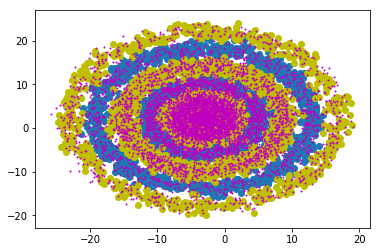

In [14]:
#Prüfe, das die Trainings- und Testdaten eine ähnliche Struktur haben
plt.scatter(Xtrain.values[ytrain.y==0,0],Xtrain.values[ytrain.y==0,1])
plt.scatter(Xtrain.values[ytrain.y==1,0],Xtrain.values[ytrain.y==1,1],c='y')
plt.scatter(Xtest.values[:,0],Xtest.values[:,1],c='m',s=1)

## Try a decision Tree

In [15]:
## Semi-Clever Test
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(Xtrain,ytrain)

yhat_test = clf.predict(Xtest)
yhat_train = clf.predict(Xtrain)

dfsol_semiclever = pd.Series(yhat_test,dtype='int',name='y')
dfsol_semiclever.index.name='Id'

dfsol_semiclever.to_csv('data/semi_clever_submission.csv',header=True)

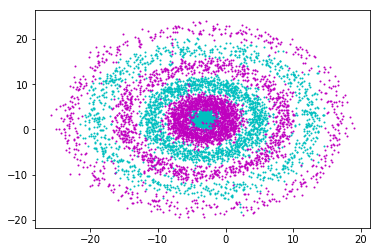

In [16]:
#plt.scatter(Xtrain.values[yhat_train==0,0],Xtrain.values[yhat_train==0,1],s=1)
#plt.scatter(Xtrain.values[yhat_train==1,0],Xtrain.values[yhat_train==1,1],c='y',s=1)
#plt.scatter(Xtest.values[y_test==0,0],Xtest.values[y_test==0,1],c='c',s=1)
#plt.scatter(Xtest.values[y_test==1,0],Xtest.values[y_test==1,1],c='m',s=1)
plt.scatter(Xtest.values[yhat_test==0,0],Xtest.values[yhat_test==0,1],c='c',s=1)
plt.scatter(Xtest.values[yhat_test==1,0],Xtest.values[yhat_test==1,1],c='m',s=1)

In [17]:
## Try a KNN Classifier

In [19]:
validation_curve?

clf=KNeighborsClassifier(n_neighbors=5)
klist=[1,5,10,20,50,100,150,200,300,500]
train_scores1, test_scores1 = validation_curve(clf, Xtrain, ytrain.values.ravel(),'n_neighbors',klist,cv=10,n_jobs=4)

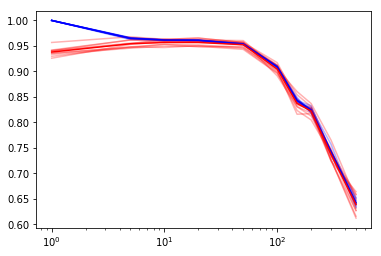

In [20]:
plt.semilogx(klist,train_scores1,c='b',alpha=0.3)
plt.semilogx(klist,test_scores1,c='r',alpha=0.3);

plt.semilogx(klist,np.mean(train_scores1,axis=1),c='b',alpha=1.0);
plt.semilogx(klist,np.mean(test_scores1,axis=1),c='r',alpha=1.0);

(0.9, 1.0)

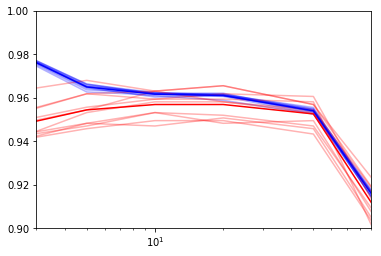

In [21]:
plt.semilogx(klist,train_scores1,c='b',alpha=0.3)
plt.semilogx(klist,test_scores1,c='r',alpha=0.3);

plt.semilogx(klist,np.mean(train_scores1,axis=1),c='b',alpha=1.0);
plt.semilogx(klist,np.mean(test_scores1,axis=1),c='r',alpha=1.0);
plt.xlim(3,90)
plt.ylim(0.90,1.0)

In [25]:
klist = range(3,50)
train_scores, test_scores = validation_curve(clf, Xtrain, ytrain.values.ravel(),'n_neighbors',klist,cv=20,n_jobs=5)

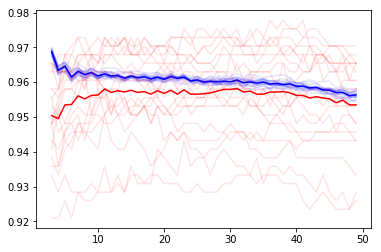

In [26]:
plt.plot(klist,np.mean(train_scores,axis=1),c='b',alpha=1.0)
plt.plot(klist,np.mean(test_scores,axis=1),c='r',alpha=1.0);
plt.plot(klist,train_scores,c='b',alpha=0.1)
plt.plot(klist,test_scores,c='r',alpha=0.1);

In [27]:
clf=KNeighborsClassifier(n_neighbors=30)
clf.fit(Xtrain,ytrain.values.ravel())

yhat_test = clf.predict(Xtest)

dfsol_semiclever = pd.Series(yhat_test,dtype='int',name='y')
dfsol_semiclever.index.name='Id'

dfsol_semiclever.to_csv('data/clever_submission.csv',header=True)

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,Xtrain,ytrain.values.ravel(),cv=35)
print('{0:1.2f}+/-{1:1.2f}'.format(np.mean(scores),np.std(scores,ddof=1)))

0.96+/-0.01


In [29]:
Xtest.shape

(8100, 2)